In [2]:

Ckpt_path = "./logs/CoNSeP_270_80/rec_CBAMECAk7_consep_preactrelubn_fullData/msge2_00_01/01/net_epoch=47.tar"
Ckpt_path = "./logs/CoNSeP_270_80/rec_CBAMECAk5_consep-tp_preactrelubn_fullData_final/net_epoch=23.tar"
Ckpt_path = "./logs/results/RESULTS_FOR_RTS_BACKUP/logs/CoNSeP/rec_preact-CBAM-ECA_k7_consepfull/00_msge2-01/net_epoch=41.tar"
Ckpt_path = "./logs/results/RESULTS_FOR_RTS_BACKUP/logs/CoNSeP/rec_preact-CBAM-ECA_k7_consepfull/00_msge2-01/net_epoch=41.tar"


#test images directory path
test_path = '../DATASETS/consep/CoNSeP/Test/smallImage/'
# test_path = '../DATASETS/consep/CoNSeP/Test/GradImages/'
test_path = '../DATASETS/consep/CoNSeP/Test/Images/'
#########################################################################################################################

##for saving inference results
save_path = "./outputs/CoNSeP_270_80/rec_CBAMECAk7_consep_preactrelubn_fullData/msge2_00_01/epoch_47/RTS/hor_ver_rot0-90_180_mult_gauNoi_gauBlur/"
save_path = "./outputs/CoNSeP_270_80/rec_CBAMECAk5_consep-tp_preactrelubn_fullData_final/epoch_23/RTS/hor_ver_rot0-90_180_mult_gauNoi_gauBlur/"
save_path = "./outputs/FinalResults/CoNSeP_270_80/rec_preact-CBAM-ECA_k7_consepfull/00_msge2-01/epoch_41/RTS/hor_ver_rot90-45_mult_gauNoi_gauBlur/"

save_path = "./outputs/FinalResults/CoNSeP_270_80/rec_preact-CBAM-ECA_k7_consepfull/00_msge2-01/epoch_41/RTS/hor_ver_rot90_90_mult_gauNoi_gauBlur/"
save_path = "./outputs/FinalResults/CoNSeP_270_80/rec_preact-CBAM-ECA_k7_consepfull/00_msge2-01/epoch_41/remove_holes/RTS/"
# save_path = './outputs/FinalResults/CoNSeP_270_80/rec_CBAMECAk5_consep-tp_preactrelubn_fullData/msge2_00_01/epoch_23/RTS/hor_ver_rot0-90_180_mult_gauNoi_gauBlur/'

model_mode = "original"

In [4]:
#this is a generic cell for inference
# !CUDA_LAUNCH_BLOCKING=1 \
import os
os.environ['MKL_THREADING_LAYER'] = 'GNU'
# os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

! python run_infer.py --batch_size='24' --model_path={Ckpt_path} --model_mode={model_mode} tile --input_dir={test_path}  --output_dir={save_path}  --draw_dot --save_raw_map 

|2022-05-29|08:08:29.478| [INFO] .... Detect #GPUS: 1
1024 7 cbam's kernel size
512 7 cbam's kernel size
256 7 cbam's kernel size
../DATASETS/consep/CoNSeP/Test/Images/test_1.png
../DATASETS/consep/CoNSeP/Test/Images/test_10.png
../DATASETS/consep/CoNSeP/Test/Images/test_11.png
../DATASETS/consep/CoNSeP/Test/Images/test_12.png
../DATASETS/consep/CoNSeP/Test/Images/test_13.png
../DATASETS/consep/CoNSeP/Test/Images/test_14.png
../DATASETS/consep/CoNSeP/Test/Images/test_2.png
../DATASETS/consep/CoNSeP/Test/Images/test_3.png
../DATASETS/consep/CoNSeP/Test/Images/test_4.png
../DATASETS/consep/CoNSeP/Test/Images/test_5.png
../DATASETS/consep/CoNSeP/Test/Images/test_6.png
../DATASETS/consep/CoNSeP/Test/Images/test_7.png
../DATASETS/consep/CoNSeP/Test/Images/test_8.png
../DATASETS/consep/CoNSeP/Test/Images/test_9.png
file_paths :  14 ['test_1.png', 'test_10.png', 'test_11.png', 'test_12.png', 'test_13.png', 'test_14.png', 'test_2.png', 'test_3.png', 'test_4.png', 'test_5.png', 'test_6.png', 't

In [5]:
##Variables for saving full PanNuke's with valid padding inference results and stats

pred_path = save_path + 'mat/' #path to test test predictions obtained by inference
true_path = '../DATASETS/consep/CoNSeP/Test/Labels/'

!python compute_stats.py --mode=instance --pred_dir={pred_path} --true_dir={true_path}

./outputs/FinalResults/CoNSeP_270_80/rec_preact-CBAM-ECA_k7_consepfull/00_msge2-01/epoch_41/remove_holes/RTS/mat/
test_1
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 21

In [3]:
##BnW overlays to colorful overlays

import glob
from scipy.io import loadmat
import numpy as np 
from misc.viz_utils import *
import cv2
import os
import json

img_path = test_path
json_dir = save_path + "/json/"
overlay2_path = f"{overlays_dir[:-4]+'overlay2'}"

for overlay_path in glob.glob(json_dir+"*.json"):
    file_name = overlay_path.split('/')[-1]

    print(overlay_path.split('/')[-1][:-5])
    img = cv2.imread(img_path+overlay_path.split('/')[-1][:-5]+".png")
    
    # Opening JSON file
    f = open(overlay_path)
    # returns JSON object as a dictionary
    inst_map = json.load(f)

    #     overlay = visualize_instances_map(inst_map, img )
    overlay = visualize_instances_dict(img, inst_map['nuc'])
    print(overlay.shape)
    cv2.imwrite(overlay2_path +'/' + file_name[:-5] + '.png', overlay)

test_2
(1000, 1000, 3)
[[430, 0], [430, 3], [432, 5], [433, 5], [435, 7], [435, 8], [436, 7], [437, 7], [438, 6], [439, 6], [440, 5], [441, 5], [442, 4], [444, 4], [446, 2], [446, 0]]
[[593, 0], [593, 2], [595, 4], [595, 5], [599, 9], [599, 10], [606, 17], [608, 17], [609, 18], [610, 17], [609, 16], [609, 14], [608, 13], [608, 11], [607, 10], [607, 9], [606, 8], [606, 6], [605, 5], [605, 4], [603, 2], [603, 1], [602, 0]]
[[657, 0], [658, 1], [658, 2], [665, 9], [665, 10], [668, 13], [668, 14], [676, 22], [676, 23], [678, 25], [678, 26], [679, 26], [682, 29], [683, 29], [686, 32], [686, 33], [688, 35], [689, 35], [689, 33], [688, 32], [688, 30], [687, 29], [687, 26], [686, 25], [686, 24], [685, 23], [685, 22], [684, 21], [684, 18], [683, 17], [683, 14], [682, 13], [682, 11], [680, 9], [680, 8], [678, 6], [678, 5], [676, 3], [676, 2], [675, 1], [675, 0]]
[[174, 2], [173, 3], [172, 3], [171, 4], [170, 4], [170, 5], [169, 6], [170, 7], [170, 10], [169, 11], [170, 12], [170, 17], [171, 17],

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [26]:
Ckpt_path = "./logs/Original/hovernet_original_consep_notype_tf2pytorch.tar"


test_path = '../DATASETS/consep/CoNSeP/Test/Images/'
# test_path = '../DATASETS/consep/CoNSeP/Test/smallImage/'

save_path = './outputs/Original/CoNSeP_270_80/hovernet_original_consep_notype_tf2pytorch/'
save_path = './outputs/Original/CoNSeP_270_80/hovernet_original_consep_notype_tf2pytorch/RTS/'

model_mode="original"

In [27]:
#this is a generic cell for inference
# !CUDA_LAUNCH_BLOCKING=1 \
import os
os.environ['MKL_THREADING_LAYER'] = 'GNU'

! python run_infer.py --batch_size='24' --model_path={Ckpt_path} --model_mode={model_mode} tile --input_dir={test_path}  --output_dir={save_path}  --draw_dot --save_raw_map 

|2022-05-26|20:45:02.365| [INFO] .... Detect #GPUS: 1
../DATASETS/consep/CoNSeP/Test/Images/test_1.png
../DATASETS/consep/CoNSeP/Test/Images/test_10.png
../DATASETS/consep/CoNSeP/Test/Images/test_11.png
../DATASETS/consep/CoNSeP/Test/Images/test_12.png
../DATASETS/consep/CoNSeP/Test/Images/test_13.png
../DATASETS/consep/CoNSeP/Test/Images/test_14.png
../DATASETS/consep/CoNSeP/Test/Images/test_2.png
../DATASETS/consep/CoNSeP/Test/Images/test_3.png
../DATASETS/consep/CoNSeP/Test/Images/test_4.png
../DATASETS/consep/CoNSeP/Test/Images/test_5.png
../DATASETS/consep/CoNSeP/Test/Images/test_6.png
../DATASETS/consep/CoNSeP/Test/Images/test_7.png
../DATASETS/consep/CoNSeP/Test/Images/test_8.png
../DATASETS/consep/CoNSeP/Test/Images/test_9.png
file_paths :  14 ['test_1.png', 'test_10.png', 'test_11.png', 'test_12.png', 'test_13.png', 'test_14.png', 'test_2.png', 'test_3.png', 'test_4.png', 'test_5.png', 'test_6.png', 'test_7.png', 'test_8.png', 'test_9.png']
Process Patches:   0%|              

In [ ]:
##Variables for saving full PanNuke's with valid padding inference results and stats

pred_path = save_path + 'mat/' #path to test test predictions obtained by inference
true_path = '../DATASETS/consep/CoNSeP/Test/Labels/'

!python compute_stats.py --mode=instance --pred_dir={pred_path} --true_dir={true_path}

./outputs/Original/CoNSeP_270_80/hovernet_original_consep_notype_tf2pytorch/RTS/mat/
test_1
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223

#### CoNSeP class

In [1]:
Ckpt_path = '../hovernet_latest/hover_net/logs/CoNSeP_270_80/rec_CBAMECAk5_consep-tp_preactrelubn_fullData/msge2_00_01/01/net_epoch=23.tar'


test_path = '../DATASETS/consep/CoNSeP/Test/Images/'
# test_path = '../DATASETS/consep/CoNSeP/Test/smallImage/'


save_path = './outputs/FinalResults/CoNSeP_270_80/rec_CBAMECAk5_consep-tp_preactrelubn_fullData/msge2_00_01/epoch_23/RTS2/hor_ver_rot0-90_180_mult_gauNoi_gauBlur/'
save_path = './outputs/FinalResults/CoNSeP_270_80/rec_CBAMECAk5_consep-tp_preactrelubn_fullData/msge2_00_01/epoch_23/RTS2/hor_ver_rot90-90_mult_gauNoi_gauBlur/'

model_mode = 'original'


In [ ]:
#this is a generic cell for inference
import os
os.environ['MKL_THREADING_LAYER'] = 'GNU'

!python run_infer.py  --batch_size='8'  --nr_types=5 --type_info_path=type_info-Consep.json --model_path={Ckpt_path} --model_mode={model_mode} tile --input_dir={test_path}  --output_dir={save_path}  --draw_dot --save_raw_map

|2022-04-05|00:21:56.468| [INFO] .... Detect #GPUS: 1
1024 7 cbam's kernel size
512 7 cbam's kernel size
256 7 cbam's kernel size
../DATASETS/consep/CoNSeP/Test/Images/test_1.png
../DATASETS/consep/CoNSeP/Test/Images/test_10.png
../DATASETS/consep/CoNSeP/Test/Images/test_11.png
../DATASETS/consep/CoNSeP/Test/Images/test_12.png
../DATASETS/consep/CoNSeP/Test/Images/test_13.png
../DATASETS/consep/CoNSeP/Test/Images/test_14.png
../DATASETS/consep/CoNSeP/Test/Images/test_2.png
../DATASETS/consep/CoNSeP/Test/Images/test_3.png
../DATASETS/consep/CoNSeP/Test/Images/test_4.png
../DATASETS/consep/CoNSeP/Test/Images/test_5.png
../DATASETS/consep/CoNSeP/Test/Images/test_6.png
../DATASETS/consep/CoNSeP/Test/Images/test_7.png
../DATASETS/consep/CoNSeP/Test/Images/test_8.png
../DATASETS/consep/CoNSeP/Test/Images/test_9.png
file_paths :  14 ['test_1.png', 'test_10.png', 'test_11.png', 'test_12.png', 'test_13.png', 'test_14.png', 'test_2.png', 'test_3.png', 'test_4.png', 'test_5.png', 'test_6.png', 't

In [ ]:

pred_path = save_path + 'mat/' #path to test test predictions obtained by inference
true_path = '../DATASETS/consep/CoNSeP/Test/Labels/'

!python compute_stats.py --mode=type --pred_dir={pred_path} --true_dir={true_path} --dataset=consep

In [ ]:

pred_path = save_path + 'mat/' #path to test test predictions obtained by inference
true_path = '../DATASETS/consep/CoNSeP/Test/Labels/'

!python compute_stats.py --mode=instance --pred_dir={pred_path} --true_dir={true_path} --dataset=consep

In [1]:
import numpy as np
import matplotlib.pyplot as plt

(array([0., 2., 3.], dtype=float32), (5, 1, 80, 80))

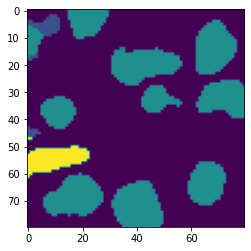

In [32]:
img = np.load('./tp_testing.npy')
plt.imshow(img[1,0,...])
np.unique(img[0,0,...]), img.shape

(5, 2, 80, 80)

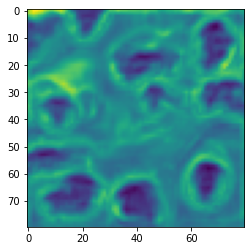

In [33]:
img2 = np.load('./mean_mask_np.npy')
plt.imshow(img2[1,0,...])
# np.unique(img[0,0,...])
img2.shape

array([0., 1., 2., 3., 4.], dtype=float32)

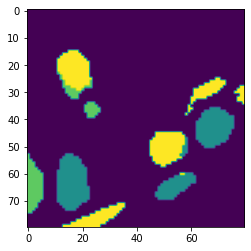

In [34]:
img3 = np.load('./tp_wo_RTS.npy')
plt.imshow(img3[1,...])
img3.shape
np.unique(img3)

(5, 80, 80, 1)

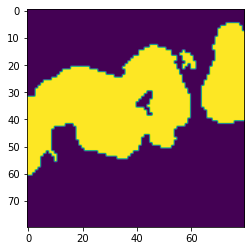

In [35]:
img4= np.load('./tp_RTS.npy')
plt.imshow(img4[4,...])
img4.shape
# np.unique(img4)

(5, 80, 80, 1)

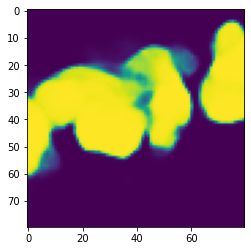

In [36]:
img4= np.load('./np_RTS.npy')
plt.imshow(img4[4,...])
img4.shape
np.unique(img4)
img4.shape

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


array([0., 2., 3.], dtype=float32)

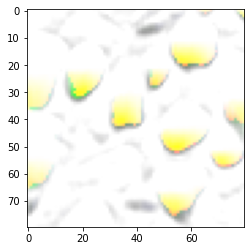

In [38]:
img4= np.load('./pred_output.npy')
plt.imshow(img4[0,...])
img4.shape
np.unique(img4)
img4.shape
np.unique(img4[0,...,0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


array([0., 2., 4.], dtype=float32)

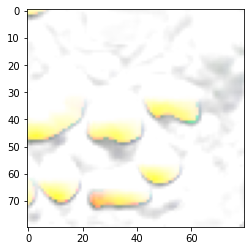

In [39]:
img4= np.load('./pred_output_.npy')
plt.imshow(img4[2,...])
img4.shape
np.unique(img4)
img4.shape
np.unique(img4[0,...,0])
# img4.shape

In [7]:
import numpy as np
import glob as glob

In [11]:

image_path = '../DATASETS/training_data/consep_class/consep/train/540x540_80x80/train_15_152.npy'
images_path = '../DATASETS/training_data/consep_class/consep/train/540x540_80x80/'


for path in glob.glob(images_path+'*.npy'):
    img = np.load(path)
    ins_types = np.unique(img[...,-1])
    if 5 in ins_types:
        print(path, np.unique(img[...,-1]))
# np.unique(img[...,3:])

In [5]:
np.unique(img[...,-1])


array([0, 2, 4], dtype=int32)

## CPM17


In [4]:
Ckpt_path = './logs/results/RESULTS_FOR_RTS_BACKUP/logs/cpm17/rec_preact-CBAM-ECA_k7_cpm17/00_msge2-01/net_epoch=41.tar'

test_path = '../DATASETS/cpm17/test/Images/'

save_path = "./outputs/FinalResults/cpm17/rec_preact-CBAM-ECA_k7_cpm17/epoch_41/RTS/hor_ver_rot90_90_mult_gauNoi_gauBlur/"

model_mode = 'original'

In [ ]:
#this is a generic cell for inference
# !CUDA_LAUNCH_BLOCKING=1 \
import os
os.environ['MKL_THREADING_LAYER'] = 'GNU'

! python run_infer.py --batch_size='8' --model_path={Ckpt_path} --model_mode={model_mode} tile --input_dir={test_path}  --output_dir={save_path}  --draw_dot --save_raw_map 

|2022-05-23|02:24:42.959| [INFO] .... Detect #GPUS: 1
1024 7 cbam's kernel size
512 7 cbam's kernel size
256 7 cbam's kernel size
../DATASETS/cpm17/test/Images/image_00.png
../DATASETS/cpm17/test/Images/image_01.png
../DATASETS/cpm17/test/Images/image_02.png
../DATASETS/cpm17/test/Images/image_03.png
../DATASETS/cpm17/test/Images/image_04.png
../DATASETS/cpm17/test/Images/image_05.png
../DATASETS/cpm17/test/Images/image_06.png
../DATASETS/cpm17/test/Images/image_07.png
../DATASETS/cpm17/test/Images/image_08.png
../DATASETS/cpm17/test/Images/image_09.png
../DATASETS/cpm17/test/Images/image_10.png
../DATASETS/cpm17/test/Images/image_11.png
../DATASETS/cpm17/test/Images/image_12.png
../DATASETS/cpm17/test/Images/image_13.png
../DATASETS/cpm17/test/Images/image_14.png
../DATASETS/cpm17/test/Images/image_15.png
../DATASETS/cpm17/test/Images/image_16.png
../DATASETS/cpm17/test/Images/image_17.png
../DATASETS/cpm17/test/Images/image_18.png
../DATASETS/cpm17/test/Images/image_19.png
../DATASET

In [30]:
##original 
Ckpt_path = './logs/Original/hovernet_original_cpm17_notype_tf2pytorch.tar'
Ckpt_path = './logs/cpm17/train_on_test_sharedCBAMECAk5_cpm17_preactSP-BN-RELu/mse2-msge2/03/01/net_epoch=14.tar'

test_path = '../DATASETS/cpm17/test/Images/'
test_path = '../DATASETS/cpm17/train/Images/'

save_path = "./outputs/Original/cpm17/hovernet_original_cpm17_notype_tf2pytorch/train/"
save_path = "./outputs/Original/cpm17/train_on_test_sharedCBAMECAk7_cpm17_preactSP-BN-RELu/epoch_49/rem_holes/RTS/"
save_path = "./outputs/Original/cpm17/train_on_test_sharedCBAMECAk5_cpm17_preactSP-BN-RELu/mse2-msge2/epoch_39/rem_holes/RTS/"

model_mode = 'original'

In [23]:
#this is a generic cell for inference
# !CUDA_LAUNCH_BLOCKING=1 \
import os
os.environ['MKL_THREADING_LAYER'] = 'GNU'

! python run_infer.py --batch_size='24' --model_path={Ckpt_path} --model_mode={model_mode} tile --input_dir={test_path}  --output_dir={save_path}  --draw_dot --save_raw_map 

|2022-05-29|10:29:15.194| [INFO] .... Detect #GPUS: 1
1024 5 cbam's kernel size
512 5 cbam's kernel size
256 5 cbam's kernel size
../DATASETS/cpm17/train/Images/image_00.png
../DATASETS/cpm17/train/Images/image_01.png
../DATASETS/cpm17/train/Images/image_02.png
../DATASETS/cpm17/train/Images/image_03.png
../DATASETS/cpm17/train/Images/image_04.png
../DATASETS/cpm17/train/Images/image_05.png
../DATASETS/cpm17/train/Images/image_06.png
../DATASETS/cpm17/train/Images/image_07.png
../DATASETS/cpm17/train/Images/image_08.png
../DATASETS/cpm17/train/Images/image_09.png
../DATASETS/cpm17/train/Images/image_10.png
../DATASETS/cpm17/train/Images/image_11.png
../DATASETS/cpm17/train/Images/image_12.png
../DATASETS/cpm17/train/Images/image_13.png
../DATASETS/cpm17/train/Images/image_14.png
../DATASETS/cpm17/train/Images/image_15.png
../DATASETS/cpm17/train/Images/image_16.png
../DATASETS/cpm17/train/Images/image_17.png
../DATASETS/cpm17/train/Images/image_18.png
../DATASETS/cpm17/train/Images/ima

In [31]:
##Variables for saving full PanNuke's with valid padding inference results and stats

pred_path = save_path + 'mat/' #path to test test predictions obtained by inference
true_path = '../DATASETS/cpm17/test/Labels/'
true_path = '../DATASETS/cpm17/train/Labels/'

!python compute_stats.py --mode=instance --pred_dir={pred_path} --true_dir={true_path}

In [39]:
##BnW overlays to colorful overlays

import glob
from scipy.io import loadmat
import numpy as np 
from misc.viz_utils import *
import cv2
import os
import json

img_path = test_path
json_dir = save_path + "json/"
json_dir = "./outputs/FinalResults/cpm17/cpm17train_on_test_sharedCBAMECAk5_cpm17_preactSP-BN-RELu/mse2-msge2/epoch_39/rem_holes/RTS/json/"
print(json_dir)
overlay2_path = f"{json_dir[:-6]+'/overlay2/'}"
print(overlay2_path)
os.makedirs(overlay2_path, exist_ok=True)
for overlay_path in glob.glob(json_dir+"*.json"):
    file_name = overlay_path.split('/')[-1]

    print(img_path+overlay_path.split('/')[-1][:-5]+".png")
    img = cv2.imread(img_path+overlay_path.split('/')[-1][:-5]+".png")
    
    # Opening JSON file
    f = open(overlay_path)
    # returns JSON object as a dictionary
    inst_map = json.load(f)

    #     overlay = visualize_instances_map(inst_map, img )
    overlay = visualize_instances_dict(img, inst_map['nuc'])
    print(overlay.shape)
    cv2.imwrite(overlay2_path +'/' + file_name[:-5] + '.png', overlay)

./outputs/FinalResults/cpm17/cpm17train_on_test_sharedCBAMECAk5_cpm17_preactSP-BN-RELu/mse2-msge2/epoch_39/rem_holes/RTS/json/
./outputs/FinalResults/cpm17/cpm17train_on_test_sharedCBAMECAk5_cpm17_preactSP-BN-RELu/mse2-msge2/epoch_39/rem_holes/RTS/overlay2/
../DATASETS/cpm17/train/Images/image_03.png
(600, 600, 3)
(600, 600, 3)
../DATASETS/cpm17/train/Images/image_26.png
(500, 500, 3)
(500, 500, 3)
../DATASETS/cpm17/train/Images/image_31.png
(500, 500, 3)
(500, 500, 3)
../DATASETS/cpm17/train/Images/image_24.png
(600, 600, 3)
(600, 600, 3)
../DATASETS/cpm17/train/Images/image_22.png
(500, 500, 3)
(500, 500, 3)
../DATASETS/cpm17/train/Images/image_10.png
(500, 500, 3)
(500, 500, 3)
../DATASETS/cpm17/train/Images/image_01.png
(500, 500, 3)
(500, 500, 3)
../DATASETS/cpm17/train/Images/image_21.png
(600, 600, 3)
(600, 600, 3)
../DATASETS/cpm17/train/Images/image_14.png
(500, 500, 3)
(500, 500, 3)
../DATASETS/cpm17/train/Images/image_16.png
(500, 500, 3)
(500, 500, 3)
../DATASETS/cpm17/trai

## KUMAR


In [63]:
Ckpt_path = './logs/results/RESULTS_FOR_RTS_BACKUP/logs/kumarFull/msge2-00-01/net_epoch=36.tar'
Ckpt_path = './logs/results/RESULTS_FOR_RTS_BACKUP/logs/kumarFull/00_msge2-01/net_epoch=38.tar'
# Ckpt_path = './logs/results/RESULTS_FOR_RTS_BACKUP/logs/cpm17/rec_preact-CBAM-ECA_k7_cpm17/00_msge2-01/net_epoch=41.tar'
# Ckpt_path = './logs/Original/hovernet_original_kumar_notype_tf2pytorch.tar'

test_path = './logs/results/DATA/kumar/comb/Images/'
test_path = '../DATASETS/kumar/test_comb/Images/'


save_path = "./outputs/FinalResults/kumarFull/epoch_36/RTS/hor_ver_rot0-90_180_mult_gauNoi_gauBlur/"
save_path = "./outputs/FinalResults/kumarFull/00_msge2-01/epoch_38/RTS/hor_ver_rot0-90_180_mult_gauNoi_gauBlur/"
# save_path = "./outputs/FinalResults/cpm17/rec_preact-CBAM-ECA_k7_cpm17/epoch_41/RTS/hor_ver_rot0-90_180_mult_gauNoi_gauBlur/"
save_path = "./outputs/FinalResults/kumarFull/00_msge2-01/epoch_38/remove_holes/RTS/hor_ver_rot90_90_mult_gauNoi_gauBlur/"
# save_path = "./outputs/FinalResults/kumarFull/00_msge2-01/epoch_38/RTS/hor_ver_rot90_90_mult_gauNoi_gauBlur/"
# save_path = "./outputs/Original/kumar/hovernet_original_kumar_notype_tf2pytorch"

model_mode = "original"

In [ ]:
#this is a generic cell for inference
# !CUDA_LAUNCH_BLOCKING=1 \
import os
os.environ['MKL_THREADING_LAYER'] = 'GNU'

! python run_infer.py --batch_size='24' --model_path={Ckpt_path} --model_mode={model_mode} tile --input_dir={test_path}  --output_dir={save_path}  --draw_dot --save_raw_map 

|2022-05-29|16:47:10.322| [INFO] .... Detect #GPUS: 1
../DATASETS/kumar/test_comb/Images/TCGA-21-5784-01Z-00-DX1.tif
../DATASETS/kumar/test_comb/Images/TCGA-21-5786-01Z-00-DX1.tif
../DATASETS/kumar/test_comb/Images/TCGA-AY-A8YK-01A-01-TS1.tif
../DATASETS/kumar/test_comb/Images/TCGA-B0-5698-01Z-00-DX1.tif
../DATASETS/kumar/test_comb/Images/TCGA-B0-5710-01Z-00-DX1.tif
../DATASETS/kumar/test_comb/Images/TCGA-CH-5767-01Z-00-DX1.tif
../DATASETS/kumar/test_comb/Images/TCGA-DK-A2I6-01A-01-TS1.tif
../DATASETS/kumar/test_comb/Images/TCGA-E2-A14V-01Z-00-DX1.tif
../DATASETS/kumar/test_comb/Images/TCGA-E2-A1B5-01Z-00-DX1.tif
../DATASETS/kumar/test_comb/Images/TCGA-G2-A2EK-01A-02-TSB.tif
../DATASETS/kumar/test_comb/Images/TCGA-G9-6362-01Z-00-DX1.tif
../DATASETS/kumar/test_comb/Images/TCGA-KB-A93J-01A-01-TS1.tif
../DATASETS/kumar/test_comb/Images/TCGA-NH-A8F7-01A-01-TS1.tif
../DATASETS/kumar/test_comb/Images/TCGA-RD-A8N9-01A-01-TS1.tif
file_paths :  14 ['TCGA-21-5784-01Z-00-DX1.tif', 'TCGA-21-5786-0

In [ ]:
##Variables for saving full PanNuke's with valid padding inference results and stats

pred_path = save_path + 'mat/' #path to test test predictions obtained by inference
true_path = '../DATASETS/kumar/test_comb/Labels2/'
# true_path = '../DATASETS/cpm17/test/Labels/'

!python compute_stats.py --mode=instance --pred_dir={pred_path} --true_dir={true_path}

In [ ]:
##BnW overlays to colorful overlays

import glob
from scipy.io import loadmat
import numpy as np 
from misc.viz_utils import *
import cv2
import os
import json

img_path = test_path
json_dir = save_path + "/json/"
print(json_dir[:-6])
overlay2_path = f"{json_dir[:-6]+'overlay2/'}"

for overlay_path in glob.glob(json_dir+"*.json"):
    file_name = overlay_path.split('/')[-1]

    print(img_path+overlay_path.split('/')[-1][:-5]+".tif")
    print(overlay2_path)
    img = cv2.imread(img_path+overlay_path.split('/')[-1][:-5]+".tif")
    
    # Opening JSON file
    f = open(overlay_path)
    # returns JSON object as a dictionary
    inst_map = json.load(f)

    #     overlay = visualize_instances_map(inst_map, img )
    overlay = visualize_instances_dict(img, inst_map['nuc'])
    print(overlay.shape, overlay2_path + file_name[:-5])
    cv2.imwrite(overlay2_path +'/' + file_name[:-5] + '.png', overlay)

In [ ]:
Ckpt_path = './logs/results/RESULTS_FOR_RTS_BACKUP/logs/kumarFull/msge2-00-01/net_epoch=36.tar'

test_path = './logs/results/DATA/kumar/comb/Images/'
# test_path = '../DATASETS/cpm17/test/Images/'

save_path = "./outputs/FinalResults/kumarFull/00_msge2-01/epoch_36/RTS/hor_ver_rot90_90_mult_gauNoi_gauBlur/"

model_mode = "original"

In [ ]:
#this is a generic cell for inference
# !CUDA_LAUNCH_BLOCKING=1 \
import os
os.environ['MKL_THREADING_LAYER'] = 'GNU'

! python run_infer.py --batch_size='24' --model_path={Ckpt_path} --model_mode={model_mode} tile --input_dir={test_path}  --output_dir={save_path}  --draw_dot --save_raw_map 

In [ ]:
##Variables for saving full PanNuke's with valid padding inference results and stats

pred_path = save_path + 'mat/' #path to test test predictions obtained by inference
true_path = '../DATASETS/kumar/test_comb/Labels2/'
# true_path = '../DATASETS/cpm17/test/Labels/'

!python compute_stats.py --mode=instance --pred_dir={pred_path} --true_dir={true_path}

In [ ]:
##BnW overlays to colorful overlays

import glob
from scipy.io import loadmat
import numpy as np 
from misc.viz_utils import *
import cv2
import os
import json

img_path = test_path
json_dir = save_path + "/json/"
print(json_dir[:-6])
overlay2_path = f"{json_dir[:-6]+'overlay2'}"

for overlay_path in glob.glob(json_dir+"*.json"):
    file_name = overlay_path.split('/')[-1]

    print(img_path+overlay_path.split('/')[-1][:-5]+".png")
    img = cv2.imread(img_path+overlay_path.split('/')[-1][:-5]+".png")
    
    # Opening JSON file
    f = open(overlay_path)
    # returns JSON object as a dictionary
    inst_map = json.load(f)

    #     overlay = visualize_instances_map(inst_map, img )
    overlay = visualize_instances_dict(img, inst_map['nuc'])
    print(overlay.shape)
    cv2.imwrite(overlay2_path +'/' + file_name[:-5] + '.png', overlay)

# PANNUKE

In [6]:
Ckpt_path = './logs/results/RESULTS_FOR_RTS_BACKUP/logs/Pannuke/tp_preact-CBAM-ECA_k7_pannuke_fold2Tr_fold1Val_amp/net_epoch=41.tar'

#test images directory path
test_path = '../DATASETS/fold3/images/'
test_path = '../DATASETS/fold3/moved_images/'
## test_path = '../DATASETS/consep/CoNSeP/Test/GradImages/'
#########################################################################################################################

##for saving inference results
save_path = './outputs/FinalResults/Pannuke/old/tp_preact-CBAM-ECA_k7_pannuke_fold2Tr_fold1Val_amp/net_epoch41/RTS/hor_ver_rot0-90_180_mult_gauNoi_gauBlur/'
save_path = './outputs/FinalResults/Pannuke/old/tp_preact-CBAM-ECA_k7_pannuke_fold2Tr_fold1Val_amp/net_epoch41/RTS/hor_ver_mult_gauNoi_gauBlur/'
save_path = './outputs/FinalResults/Pannuke/old/tp_preact-CBAM-ECA_k7_pannuke_fold2Tr_fold1Val_amp/net_epoch41/RTS/hor_ver_rot90_90_mult_gauNoi_gauBlur/'
save_path = './outputs/FinalResults/Pannuke/tp_preact-CBAM-ECA_k7_pannuke_fold2Tr_fold1Val_amp/net_epoch41/RTS/hor_ver_rot90_90_mult_gauNoi_gauBlur/moved/'
save_path = './outputs/FinalResults/Pannuke/tp_preact-CBAM-ECA_k7_pannuke_fold2Tr_fold1Val_amp/net_epoch41/RTS/hor_ver_rot90_90_mult_gauNoi_gauBlur/'

model_mode = "fast"

In [4]:
#this is a generic cell for inference
import os
os.environ['MKL_THREADING_LAYER'] = 'GNU'

!python run_infer.py  --batch_size='16'  --nr_types=6 --type_info_path=type_info_PanNuke.json --model_path={Ckpt_path} --model_mode={model_mode} tile --input_dir={test_path}  --output_dir={save_path}  --draw_dot --save_raw_map

|2022-04-18|00:27:45.980| [INFO] .... Detect #GPUS: 1
1024 7 cbam's kernel size
512 7 cbam's kernel size
256 7 cbam's kernel size
../DATASETS/fold3/moved_images/f3_Breast_image187.npy
../DATASETS/fold3/moved_images/f3_Breast_image600.npy
file_paths :  2 ['f3_Breast_image187.npy', 'f3_Breast_image600.npy']
Process Patches:   0%|                                    | 0/1 [00:00<?, ?it/s]batch data size  torch.Size([1, 256, 256, 3])
8
0 <ttach.base.Compose object at 0x7f0d80e30898> <ttach.base.Transformer object at 0x7f0d80e30a20>
1 <ttach.base.Compose object at 0x7f0d80e30898> <ttach.base.Transformer object at 0x7f0d80e30cc0>
tp2 torch.Size([1, 164, 164, 6])
cat: torch.Size([2, 1, 1, 164, 164])
2 <ttach.base.Compose object at 0x7f0d80e30898> <ttach.base.Transformer object at 0x7f0d80e30cf8>
tp2 torch.Size([1, 164, 164, 6])
cat: torch.Size([3, 1, 1, 164, 164])
3 <ttach.base.Compose object at 0x7f0d80e30898> <ttach.base.Transformer object at 0x7f0d80e30da0>
tp2 torch.Size([1, 164, 164, 6])


In [9]:

pred_path = save_path + 'mat/' #path to test test predictions obtained by inference
true_path = '../DATASETS/fold3/Labels'

!python compute_stats.py --mode=instance --pred_dir={pred_path} --true_dir={true_path} --dataset=pannuke

./outputs/FinalResults/Pannuke/tp_preact-CBAM-ECA_k7_pannuke_fold2Tr_fold1Val_amp/net_epoch41/RTS/hor_ver_rot90_90_mult_gauNoi_gauBlur/mat/
f3_Adrenal_gland_image1094
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]

 DICE SCORE: 
  	 intersection:  10160 	 denominator:  23027
f3_Adrenal_gland_image1094	0.882442   0.727253   0.800000   0.861294   0.689035   0.743017   empty_images:  0
f3_Adrenal_gland_image1095
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]

 DICE SCORE: 
  	 intersection:  10855 	 denominator:  24159
f3_Adrenal_gland_image1095	0.898630   0.738811   0.842105   0.858221   0.722712   0.747234   empty_images:  0
f3_Adrenal_gland_image1096
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 

In [11]:

pred_path = save_path + 'mat/' #path to test test predictions obtained by inference
true_path = '../DATASETS/fold3/Labels'

!python compute_stats.py --mode=type --pred_dir={pred_path} --true_dir={true_path} --dataset=pannuke

f3_Adrenal_gland_image1094
f3_Adrenal_gland_image1095
f3_Adrenal_gland_image1096
f3_Adrenal_gland_image1097
f3_Adrenal_gland_image1098
f3_Adrenal_gland_image1099
f3_Adrenal_gland_image1100
f3_Adrenal_gland_image1101
f3_Adrenal_gland_image1102
f3_Adrenal_gland_image1103
f3_Adrenal_gland_image1104
f3_Adrenal_gland_image1105
f3_Adrenal_gland_image1106
f3_Adrenal_gland_image1107
f3_Adrenal_gland_image1108
f3_Adrenal_gland_image1109
f3_Adrenal_gland_image1110
f3_Adrenal_gland_image1111
f3_Adrenal_gland_image1112
f3_Adrenal_gland_image1113
f3_Adrenal_gland_image1114
f3_Adrenal_gland_image1115
f3_Adrenal_gland_image1116
f3_Adrenal_gland_image1117
f3_Adrenal_gland_image1118
f3_Adrenal_gland_image1119
f3_Adrenal_gland_image1120
f3_Adrenal_gland_image1121
f3_Adrenal_gland_image1122
f3_Adrenal_gland_image1123
f3_Adrenal_gland_image1124
f3_Adrenal_gland_image1125
f3_Adrenal_gland_image1126
f3_Adrenal_gland_image1127
f3_Adrenal_gland_image1128
f3_Adrenal_gland_image1129
f3_Adrenal_gland_image1130
f

In [3]:
Ckpt_path = './logs/results/RESULTS_FOR_RTS_BACKUP/logs/Pannuke/tp_preact-CBAM-ECA_k7_pannuke_fold1Tr_fold2Val_amp/tp_preact-CBAM-ECA_k7_pannuke_fold1Tr_fold2Val_amp/net_epoch=48.tar'

#test images directory path
test_path = '../DATASETS/fold3/images/'
test_path = '../DATASETS/fold3/moved_images/'

# test_path = '../DATASETS/consep/CoNSeP/Test/GradImages/'
#########################################################################################################################

##for saving inference results
save_path = './outputs/FinalResults/Pannuke/tp_preact-CBAM-ECA_k7_pannuke_fold1Tr_fold2Val_amp/net_epoch48/RTS/hor_ver_rot0-90_180_mult_gauNoi_gauBlur/'
save_path = './outputs/FinalResults/Pannuke/tp_preact-CBAM-ECA_k7_pannuke_fold1Tr_fold2Val_amp/net_epoch48/RTS/hor_ver_mult_gauNoi_gauBlur/'
save_path = './outputs/FinalResults/Pannuke/tp_preact-CBAM-ECA_k7_pannuke_fold1Tr_fold2Val_amp/net_epoch48/RTS/hor_ver_rot90_90_mult_gauNoi_gauBlur/'
save_path = './outputs/FinalResults/Pannuke/tp_preact-CBAM-ECA_k7_pannuke_fold1Tr_fold2Val_amp/net_epoch48/RTS/hor_ver_rot90_90_mult_gauNoi_gauBlur/moved/'

model_mode = "fast"

In [7]:
#this is a generic cell for inference
import os
os.environ['MKL_THREADING_LAYER'] = 'GNU'

!python run_infer.py  --batch_size='4'  --nr_types=6 --type_info_path=type_info_PanNuke.json --model_path={Ckpt_path} --model_mode={model_mode} tile --input_dir={test_path}  --output_dir={save_path}  --draw_dot --save_raw_map

|2022-04-17|15:55:05.474| [INFO] .... Detect #GPUS: 1
1024 7 cbam's kernel size
512 7 cbam's kernel size
256 7 cbam's kernel size
../DATASETS/fold3/moved_images/f3_Testis_image1303-Copy1.npy
../DATASETS/fold3/moved_images/f3_Testis_image1303.npy
file_paths :  2 ['f3_Testis_image1303-Copy1.npy', 'f3_Testis_image1303.npy']
Process Patches:   0%|                                    | 0/3 [00:00<?, ?it/s]batch data size  torch.Size([1, 256, 256, 3])
8
0 <ttach.base.Compose object at 0x7f3a095ea9e8> <ttach.base.Transformer object at 0x7f3a095ead68>
1 <ttach.base.Compose object at 0x7f3a095ea9e8> <ttach.base.Transformer object at 0x7f3a095eaf28>
tp2 torch.Size([1, 164, 164, 6])
cat: torch.Size([2, 1, 1, 164, 164])
2 <ttach.base.Compose object at 0x7f3a095ea9e8> <ttach.base.Transformer object at 0x7f3a095eaf60>
tp2 torch.Size([1, 164, 164, 6])
cat: torch.Size([3, 1, 1, 164, 164])
3 <ttach.base.Compose object at 0x7f3a095ea9e8> <ttach.base.Transformer object at 0x7f3a095eaf98>
tp2 torch.Size([1

In [ ]:

pred_path = save_path + 'mat/' #path to test test predictions obtained by inference
true_path = '../DATASETS/fold3/moved/Labels'
true_path = '../DATASETS/fold3/Labels'

!python compute_stats.py --mode=instance --pred_dir={pred_path} --true_dir={true_path} --dataset=pannuke

In [ ]:

pred_path = save_path + 'mat/' #path to test test predictions obtained by inference
true_path = '../DATASETS/fold3/moved/Labels'
true_path = '../DATASETS/fold3/Labels'

!python compute_stats.py --mode=type --pred_dir={pred_path} --true_dir={true_path} --dataset=pannuke

In [14]:
Ckpt_path = './logs/results/RESULTS_FOR_RTS_BACKUP/logs/Pannuke/tp_preact-CBAM-ECA_k7_pannuke_fold3Tr_fold2Val_amp/net_epoch=49.tar'

#test images directory path
test_path = '../DATASETS/fold1/images/'
test_path = '../DATASETS/fold1/moved/'
# test_path = '../DATASETS/consep/CoNSeP/Test/GradImages/'
#########################################################################################################################

##for saving inference results
save_path = './outputs/FinalResults/Pannuke/tp_preact-CBAM-ECA_k7_pannuke_fold3Tr_fold2Val_amp/net_epoch49/RTS/hor_ver_rot0-90_180_mult_gauNoi_gauBlur/'
save_path = './outputs/FinalResults/Pannuke/tp_preact-CBAM-ECA_k7_pannuke_fold3Tr_fold2Val_amp/net_epoch49/normal/'
save_path = './outputs/FinalResults/Pannuke/tp_preact-CBAM-ECA_k7_pannuke_fold3Tr_fold2Val_amp/net_epoch49/RTS_softmax/hor_ver_rot0-90_180_mult_gauNoi_gauBlur/'
save_path = './outputs/FinalResults/Pannuke/tp_preact-CBAM-ECA_k7_pannuke_fold3Tr_fold2Val_amp/net_epoch49/RTS_softmax/hor_ver_rot90_90_mult_gauNoi_gauBlur/'
save_path = './outputs/FinalResults/Pannuke/tp_preact-CBAM-ECA_k7_pannuke_fold3Tr_fold2Val_amp/net_epoch49/RTS_softmax/hor_ver_rot90_90_mult_gauNoi_gauBlur/moved2/'

model_mode = "fast"

In [17]:
#this is a generic cell for inference
import os
os.environ['MKL_THREADING_LAYER'] = 'GNU'


!python run_infer.py  --batch_size='16'  --nr_types=6 --type_info_path=type_info_PanNuke.json --model_path={Ckpt_path} --model_mode={model_mode} tile --input_dir={test_path}  --output_dir={save_path}  --draw_dot --save_raw_map

|2022-04-08|23:36:19.734| [INFO] .... Detect #GPUS: 1
1024 7 cbam's kernel size
512 7 cbam's kernel size
256 7 cbam's kernel size
../DATASETS/fold1/moved/f1_Skin_image2444-Copy1.npy
../DATASETS/fold1/moved/f1_Skin_image2444.npy
file_paths :  2 ['f1_Skin_image2444-Copy1.npy', 'f1_Skin_image2444.npy']
Process Patches:   0%|                                    | 0/2 [00:00<?, ?it/s]batch data size  torch.Size([1, 256, 256, 3])
8
0 <ttach.base.Compose object at 0x7fc6231cd828> <ttach.base.Transformer object at 0x7fc6231cdb00>
1 <ttach.base.Compose object at 0x7fc6231cd828> <ttach.base.Transformer object at 0x7fc6231cddd8>
tp2 torch.Size([1, 164, 164, 6])
cat: torch.Size([2, 1, 1, 164, 164])
2 <ttach.base.Compose object at 0x7fc6231cd828> <ttach.base.Transformer object at 0x7fc6231cde10>
tp2 torch.Size([1, 164, 164, 6])
cat: torch.Size([3, 1, 1, 164, 164])
3 <ttach.base.Compose object at 0x7fc6231cd828> <ttach.base.Transformer object at 0x7fc6231cde48>
tp2 torch.Size([1, 164, 164, 6])
cat: t

In [ ]:

pred_path = save_path + 'mat/' #path to test test predictions obtained by inference
true_path = '../DATASETS/fold1/Labels'

!python compute_stats.py --mode=type --pred_dir={pred_path} --true_dir={true_path} --dataset=pannuke

In [ ]:

pred_path = save_path + 'mat/' #path to test test predictions obtained by inference
true_path = '../DATASETS/fold1/Labels'

!python compute_stats.py --mode=instance --pred_dir={pred_path} --true_dir={true_path} --dataset=pannuke

In [ ]:
Ckpt_path = './logs/results/RESULTS_FOR_RTS_BACKUP/logs/Pannuke/tp_preact-CBAM-ECA_k7_pannuke_fold3Tr_fold2Val_amp/msge_2/net_epoch=45.tar'

#test images directory path
test_path = '../DATASETS/fold1/images/'
# test_path = '../DATASETS/consep/CoNSeP/Test/GradImages/'
#########################################################################################################################

##for saving inference results
save_path = './outputs/FinalResults/Pannuke/tp_preact-CBAM-ECA_k7_pannuke_fold3Tr_fold2Val_amp/msge_2/net_epoch45/RTS/hor_ver_rot0-90_180_mult_gauNoi_gauBlur/'

model_mode = "fast"

In [ ]:
#this is a generic cell for inference
import os
os.environ['MKL_THREADING_LAYER'] = 'GNU'

!python run_infer.py  --batch_size='24'  --nr_types=6 --type_info_path=type_info_PanNuke.json --model_path={Ckpt_path} --model_mode={model_mode} tile --input_dir={test_path}  --output_dir={save_path}  --draw_dot --save_raw_map

In [ ]:
#this is a generic cell for inference
import os
os.environ['MKL_THREADING_LAYER'] = 'GNU'

!python run_infer.py  --batch_size='8'  --nr_types=6 --type_info_path=type_info_PanNuke.json --model_path={Ckpt_path} --model_mode={model_mode} tile --input_dir={test_path}  --output_dir={save_path}  --draw_dot --save_raw_map

In [31]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

In [24]:

label_path = "../DATASETS/fold3/moved/Labels/f3_Breast_image466"
label = loadmat(label_path)
label.keys()
np.unique(label["type_map"]) #, label["type_map"], label["inst_centroid"])

array([0, 1, 2, 3], dtype=int16)

In [23]:

label_path ="./outputs/FinalResults/Pannuke/tp_preact-CBAM-ECA_k7_pannuke_fold2Tr_fold1Val_amp/net_epoch41/RTS/hor_ver_rot0-90_180_mult_gauNoi_gauBlur/mat/f3_Breast_image466.mat"
label = loadmat(label_path)
label.keys()
np.unique(label["inst_map"]), np.unique(label["inst_type"]), np.unique(label["inst_centroid"])

(array([0, 1], dtype=int32), array([3]), array([177.89059829, 205.74700855]))

array([ 28,  32,  35,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
        49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
        62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
       192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204,
       205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 21

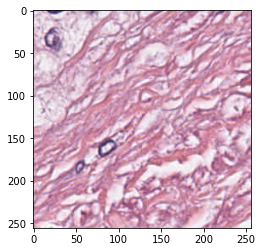

In [37]:
img_path = "../DATASETS/fold3/images/f3_Adrenal_gland_image1100.npy"
image = np.load(img_path)

image.shape
plt.imshow(np.uint8(image))
np.unique(np.uint8(image))

array([0, 1, 3], dtype=int16)

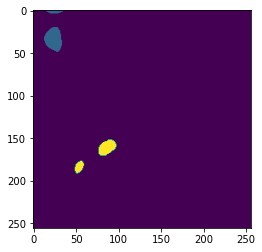

In [53]:

label_path = "../DATASETS/fold3/moved/Labels/f3_Adrenal_gland_image1103"
label = loadmat(label_path)
label.keys()
plt.imshow(label["type_map"])
np.unique(label["type_map"]) #, label["type_map"], label["inst_centroid"])


In [51]:

label_path ="./outputs/FinalResults/Pannuke/tp_preact-CBAM-ECA_k7_pannuke_fold2Tr_fold1Val_amp/net_epoch41/RTS/hor_ver_rot0-90_180_mult_gauNoi_gauBlur/mat/f3_Adrenal_gland_image1103.mat"
label = loadmat(label_path)
label.keys()
# np.unique(label["inst_map"]), np.unique(label["inst_type"]), np.unique(label["inst_centroid"])
# plt.imshow(label["inst_type"])
label["inst_map"].shape
np.unique(label["inst_map"])

array([0], dtype=int32)